In [1]:
import pandas as pd
import sqlite3

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
commit = pd.io.sql.read_sql("select cast(strftime('%H', timestamp) as int) as hour, timestamp as datetime from checker where uid LIKE 'user_%'", con=connect, parse_dates='datetime')

In [4]:
commit['is_weekend'] = commit.datetime.dt.weekday.map(lambda x: 1 if x in (5, 6) else 0)
commit['date'] = commit.datetime.dt.date


In [5]:
df = pd.pivot_table(commit.groupby(['hour', 'is_weekend', 'date']).count().reset_index(),\
                    columns='is_weekend', index='hour', aggfunc='mean', fill_value=0)\
['datetime'][[1, 0]].rename(columns={0: 'weekend', 1:'working_day'})

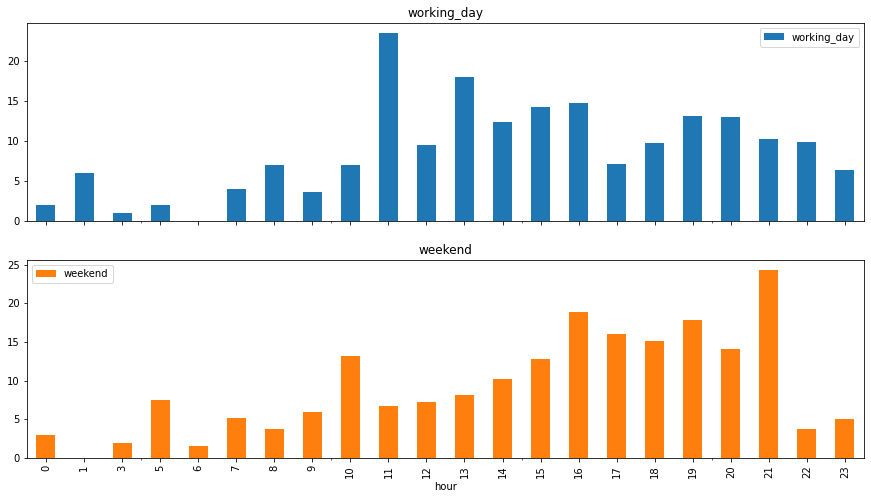

In [6]:
df.plot.bar(figsize=(15, 8), rot=90, subplots=True);

__Да, отличается__